<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-rama/Excercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Training samples: {train_images.shape[0]}, Test samples: {test_images.shape[0]}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000, Test samples: 10000


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes digits 0-9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)


Epoch 1/5
844/844 - 8s - 9ms/step - accuracy: 0.9367 - loss: 0.2179 - val_accuracy: 0.9808 - val_loss: 0.0762
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9781 - loss: 0.0729 - val_accuracy: 0.9828 - val_loss: 0.0627
Epoch 3/5
844/844 - 3s - 3ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.9878 - val_loss: 0.0490
Epoch 4/5
844/844 - 3s - 3ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.9877 - val_loss: 0.0482
Epoch 5/5
844/844 - 2s - 3ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9872 - val_loss: 0.0555


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 1s - 5ms/step - accuracy: 0.9841 - loss: 0.0484
Test accuracy: 0.9841


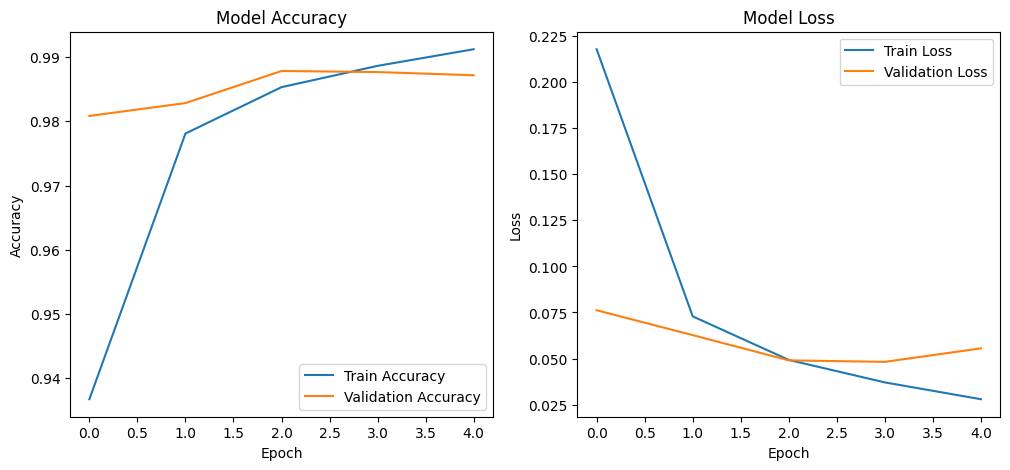

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()